<a href="https://colab.research.google.com/github/NIKITOOOK/mlAlgorithms/blob/main/IW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импортируем данные из orders.csv

In [ ]:
import pandas as pd

orders_df = pd.read_csv('orders.csv')

In [ ]:
orders_df.isna().sum().sum()

6094

# Инфо о датафрейме

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20000 non-null  int64  
 1   store_id             20000 non-null  int64  
 2   order_id             20000 non-null  int64  
 3   product_id           20000 non-null  int64  
 4   price                20000 non-null  float64
 5   profit               17911 non-null  float64
 6   delivery_distance    20000 non-null  int64  
 7   date_create          19986 non-null  object 
 8   order_start_prepare  18010 non-null  object 
 9   planned_prep_time    20000 non-null  float64
 10  order_ready          17999 non-null  object 
 11  order_pickup         20000 non-null  object 
 12  region_id            20000 non-null  int64  
 13  status_id            20000 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.1+ MB


In [ ]:
orders_df

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id
0,0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F
1,1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F
2,2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F
3,3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F
4,4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,683,F
19996,19996,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F
19997,19997,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F
19998,19998,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F


Теперь надо соединить два столбца **order_start_prepare** и **order_ready** в формате **datetimе**

In [ ]:
#     Перевдены строки в формат datetime.
orders_df['order_start_prepare'] = pd.to_datetime(orders_df['order_start_prepare'])
orders_df['order_ready'] = pd.to_datetime(orders_df['order_ready'])
#print(orders_df['order_start_prepare'],orders_df['order_ready'])

In [ ]:
orders_df['order_assembly'] = orders_df['order_ready'] - orders_df['order_start_prepare']
#print(orders_df['order_assembly'])

Ура!<sup>datetime</sup> нашел время подготовки order



In [ ]:
orders_df

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_assembly
0,0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27
1,1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27
2,2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31
3,3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31
4,4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F,0 days 00:14:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,683,F,0 days 00:25:13
19996,19996,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45
19997,19997,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45
19998,19998,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45


### 4.	Посчитать количество пропусков для каждой колонки основного датафрейма. Сделать первые выводы по пунктам выше.

In [ ]:
orders_df.isna().sum()

,0
Unnamed: 0,0
store_id,0
order_id,0
product_id,0
price,0
profit,2089
delivery_distance,0
date_create,14
order_start_prepare,1990
planned_prep_time,0


In [ ]:
df_with_empty_strings = orders_df[(orders_df == '').any(axis=1)]
df_with_empty_strings

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_assembly


In [ ]:
orders_df['order_assembly_min'] = orders_df['order_assembly'].dt.total_seconds() / 60
orders_df['order_delay'] = orders_df['planned_prep_time'] - orders_df['order_assembly_min']
orders_df

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_assembly,order_assembly_min,order_delay
0,0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000
1,1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000
2,2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667
3,3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667
4,4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F,0 days 00:14:54,14.900000,5.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,683,F,0 days 00:25:13,25.216667,-0.216667
19996,19996,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000
19997,19997,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000
19998,19998,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000


In [ ]:
negative_count = (orders_df['order_delay'] < 0).sum()
rows_count = orders_df.shape[0]
not_delivered = orders_df['order_delay'].isnull().sum()       #(df_with_empty_strings['order_delay']).sum() #df_with_empty_strings
order_not_formed = orders_df['order_start_prepare'].isnull().sum()
delovered_in_time = (orders_df['order_delay'] > 0).sum()
print("Из",rows_count, "orders, всего доставлено с задержкой:", negative_count,
      "\nДоставлено вовремя:", delovered_in_time, "\nНе доставлено:", not_delivered,
      "\nНеизвестные что с заказами:",rows_count - (delovered_in_time + not_delivered + negative_count),"\nЗаказы не отправлены:",order_not_formed )

Из 20000 orders, всего доставлено с задержкой: 5740 
Доставлено вовремя: 10459 
Не доставлено: 3793 
Неизвестные что с заказами: 8 
Заказы не отправлены: 1990


Ищу дупликаты

In [ ]:
duplicates = orders_df[orders_df.duplicated('planned_prep_time', keep=False)]

# Выводим строки с дубликатами в колонке 'planned_prep_time'
print(duplicates)

       Unnamed: 0  store_id  order_id  product_id   price   profit  \
0               0      5014  20562761          41    7.04  45.5040   
1               1      5014  20562761          31   23.45  45.5040   
2               2      3856  20562753           7   51.94  30.3360   
3               3      3856  20562753           4  188.84  30.3360   
4               4     10825  20562723          12   85.99  43.6080   
...           ...       ...       ...         ...     ...      ...   
19995       19995      7099  20535837          54    6.17  12.1976   
19996       19996      4348  20535835           8   17.26  49.2960   
19997       19997      4348  20535835           8   17.26  49.2960   
19998       19998      4348  20535835          63    8.91  49.2960   
19999       19999     11087  20535831           8   17.26  81.2120   

       delivery_distance          date_create order_start_prepare  \
0                   2205  2024-09-05 15:25:25 2024-09-05 15:25:33   
1                   2

In [ ]:
orders_df

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_assembly,order_assembly_min,order_delay
0,0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000
1,1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000
2,2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667
3,3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667
4,4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F,0 days 00:14:54,14.900000,5.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,683,F,0 days 00:25:13,25.216667,-0.216667
19996,19996,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000
19997,19997,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000
19998,19998,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000


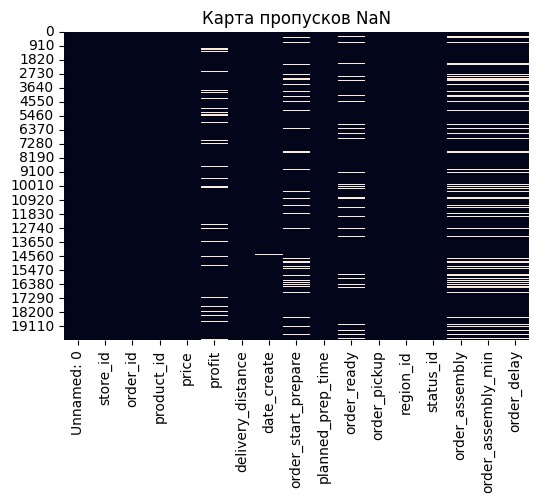

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Отображение данных с помощью heatmap
plt.figure(figsize=(6, 4))

# Используем mask, чтобы выделить NaN
sns.heatmap(orders_df.isna(), cbar=False)

plt.title('Карта пропусков NaN')
plt.show()

### 5.	Для каждой записи в основном датафрейме необходимо найти соответствующее название филиала на основе его store_id и добавить это значение в новую колонку «store_name».  Например, для записи заказа со store_id  = 5014 значение в колонке «store_name» будет то, которое указано в stores.csv напротив этого номера.

In [ ]:
stores_df = pd.read_csv('stores.csv')
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_id    62 non-null     int64 
 1   store_name  62 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
stores_df

,store_id,store_name
0,5014,KFC на Пушкинской
1,10489,KFC на Тверской
2,4360,KFC на Арбате
3,5863,KFC на Лубянке
4,9787,KFC на Садовом кольце
...,...,...
57,9497,Subway на Невском проспекте
58,4757,Subway на Новом Арбате
59,11407,Subway на Патриарших прудах
60,10973,Dunkin' Donuts на Тверской


In [ ]:
orders_expanded_df = orders_df.merge(stores_df, on='store_id', how='left')

In [ ]:
orders_expanded_df

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_assembly,order_assembly_min,order_delay,store_name
0,0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,KFC на Пушкинской
1,1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,KFC на Пушкинской
2,2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,NaN
3,3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,NaN
4,4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F,0 days 00:14:54,14.900000,5.100000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,683,F,0 days 00:25:13,25.216667,-0.216667,NaN
19996,19996,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN
19997,19997,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN
19998,19998,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN


### 6.	Аналогично создать колонку «product_name» на основе product_id
### 7. Aналогично создать колонку «region_name» на основе region_id.


In [ ]:
prodcuts_df = pd.read_csv('products.csv')
prodcuts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    71 non-null     int64 
 1   product_name  71 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
regions_df = pd.read_csv('regions.csv')
regions_df

,region_id,delivery_region_name
0,683,Sovetsky District
1,707,Kirovsky District
2,703,Oktyabrsky District
3,689,Leninsky District
4,695,Severny District
5,685,Pervomaisky District
6,709,Vostochny District
7,697,Yuzhny District


In [ ]:
prodcuts_df

,product_id,product_name
0,1,Nuggets
1,2,Carrot
2,3,Potato
3,4,Salad
4,5,Fries
...,...,...
66,67,Quesadilla
67,68,Jambalaya
68,69,Gumbo
69,70,Pho


In [ ]:
#orders_expanded_df = orders_expanded_df.merge(prodcuts_df, on='product_id', how='left')
#del orders_expanded_df['product_name_x']

orders_expanded_df = orders_df.merge(stores_df, on='store_id', how='left')
orders_expanded_df = pd.merge(orders_expanded_df, prodcuts_df, on=['product_id'], how="left")
orders_expanded_df = pd.merge(orders_expanded_df, regions_df, on=['region_id'], how="left")

In [ ]:
orders_expanded_df

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_assembly,order_assembly_min,order_delay,store_name,product_name,delivery_region_name
0,0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,KFC на Пушкинской,Nachos,Sovetsky District
1,1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,KFC на Пушкинской,Curry,Sovetsky District
2,2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,NaN,Soup,Sovetsky District
3,3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,NaN,Salad,Sovetsky District
4,4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F,0 days 00:14:54,14.900000,5.100000,NaN,Sushi,Sovetsky District
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,683,F,0 days 00:25:13,25.216667,-0.216667,NaN,Fruit Salad,Sovetsky District
19996,19996,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Steak,Sovetsky District
19997,19997,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Steak,Sovetsky District
19998,19998,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Mozzarella Sticks,Sovetsky District


###8.	Заменить пропуски в «price» на минимальную цену товара.

In [ ]:
#orders_expanded_df[numeric_columns] = orders_expanded_df.groupby('price')[numeric_columns].transform(lambda x: x.fillna(x.mean()))

#     Замена пропускав на мин. price
orders_expanded_df['price'] = orders_expanded_df.groupby('product_id')['price'].transform(lambda x: x.fillna(x.min()))
orders_expanded_df

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_assembly,order_assembly_min,order_delay,store_name,product_name,delivery_region_name
0,0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,KFC на Пушкинской,Nachos,Sovetsky District
1,1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,KFC на Пушкинской,Curry,Sovetsky District
2,2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,NaN,Soup,Sovetsky District
3,3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,NaN,Salad,Sovetsky District
4,4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F,0 days 00:14:54,14.900000,5.100000,NaN,Sushi,Sovetsky District
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,683,F,0 days 00:25:13,25.216667,-0.216667,NaN,Fruit Salad,Sovetsky District
19996,19996,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Steak,Sovetsky District
19997,19997,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Steak,Sovetsky District
19998,19998,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Mozzarella Sticks,Sovetsky District


In [ ]:
#     Проверка на пропуски
missing_price = orders_expanded_df['price'].isna().sum()
print("Количество пропусков в столбце 'price':", missing_price)

Количество пропусков в столбце 'price': 0


###9.	Создать новую колонку «items_count», в которой содержится информация о количестве товаров в каждом заказе.

In [ ]:
orders_expanded_df['items_count'] = orders_expanded_df.groupby('order_id')['product_id'].transform('count')
orders_expanded_df

,Unnamed: 0,store_id,order_id,product_id,price,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,...,order_pickup,region_id,status_id,order_assembly,order_assembly_min,order_delay,store_name,product_name,delivery_region_name,items_count
0,0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,...,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,KFC на Пушкинской,Nachos,Sovetsky District,2
1,1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,...,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,KFC на Пушкинской,Curry,Sovetsky District,2
2,2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,...,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,NaN,Soup,Sovetsky District,2
3,3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,...,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,NaN,Salad,Sovetsky District,2
4,4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,...,05-09-2024 16:06:38,683,F,0 days 00:14:54,14.900000,5.100000,NaN,Sushi,Sovetsky District,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,...,03-09-2024 15:55:40,683,F,0 days 00:25:13,25.216667,-0.216667,NaN,Fruit Salad,Sovetsky District,5
19996,19996,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,...,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Steak,Sovetsky District,3
19997,19997,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,...,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Steak,Sovetsky District,3
19998,19998,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,...,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Mozzarella Sticks,Sovetsky District,3


### 10.	Создать колонку «order_price», равную сумме стоимости всех товаров в заказе. Удалить колонку «price».

In [ ]:
# Считаем сумму стоимости товаров для каждого заказа в копии
orders_expanded_df['order_price'] = orders_expanded_df.groupby('order_id')['price'].transform('sum')

del orders_expanded_df['price']

orders_expanded_df

,Unnamed: 0,store_id,order_id,product_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,...,region_id,status_id,order_assembly,order_assembly_min,order_delay,store_name,product_name,delivery_region_name,items_count,order_price
0,0,5014,20562761,41,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,...,683,F,0 days 00:06:27,6.450000,8.550000,KFC на Пушкинской,Nachos,Sovetsky District,2,30.49
1,1,5014,20562761,31,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,...,683,F,0 days 00:06:27,6.450000,8.550000,KFC на Пушкинской,Curry,Sovetsky District,2,30.49
2,2,3856,20562753,7,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,...,683,F,0 days 00:10:31,10.516667,-0.516667,NaN,Soup,Sovetsky District,2,240.78
3,3,3856,20562753,4,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,...,683,F,0 days 00:10:31,10.516667,-0.516667,NaN,Salad,Sovetsky District,2,240.78
4,4,10825,20562723,12,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,...,683,F,0 days 00:14:54,14.900000,5.100000,NaN,Sushi,Sovetsky District,1,85.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,7099,20535837,54,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,...,683,F,0 days 00:25:13,25.216667,-0.216667,NaN,Fruit Salad,Sovetsky District,5,102.11
19996,19996,4348,20535835,8,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,...,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Steak,Sovetsky District,3,43.43
19997,19997,4348,20535835,8,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,...,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Steak,Sovetsky District,3,43.43
19998,19998,4348,20535835,63,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,...,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Mozzarella Sticks,Sovetsky District,3,43.43


### 11.	Построить гистограмму для «product_name». Сделать вывод.

In [ ]:
import plotly.express as px

fig = px.histogram(orders_expanded_df['product_name'])
fig.show()

In [ ]:
import plotly.express as px
# количество заказов для каждого товара
product_counts = orders_expanded_df['product_name'].value_counts()

#  товары с максимальным и минимальным количеством заказов
max_product = product_counts.idxmax()
min_product = product_counts.idxmin()


# упорядочивая товары по частоте
fig = px.histogram(orders_expanded_df, x='product_name',category_orders={'product_name': product_counts.index})

fig.show()



In [ ]:

# товары с максимальным и минимальным количеством заказов
max_count = product_counts.max()
min_count = product_counts.min()
print("Больше всего заказывают товар ",max_product," в количестве:",max_count)
print("Меньше всего заказывают товар ",min_product," в кол-ве:",min_count)


Больше всего заказывают товар  Dumplings  в количестве: 311
Меньше всего заказывают товар  Chicken Wings  в кол-ве: 244


### 12.	Построить график плотности (kdeplot) для «order_price». Сделать вывод.

<ipython-input-32-1cf5ad0f3013>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




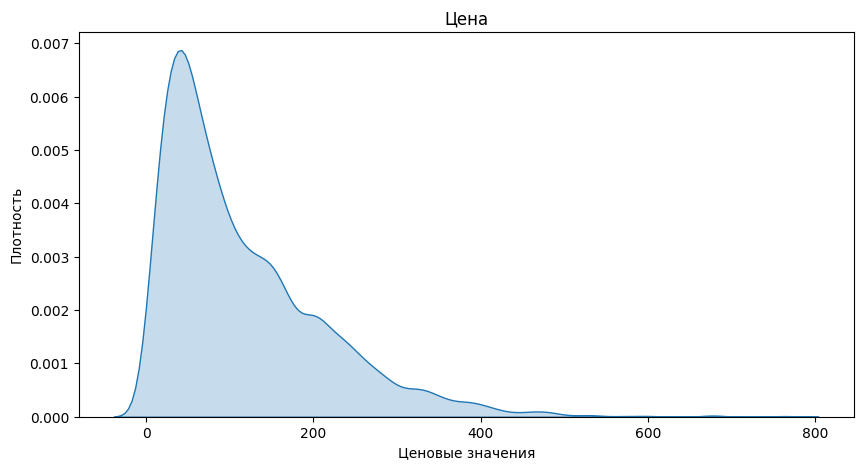

In [ ]:
import matplotlib.pyplot as plt
# размер графиков
plt.figure(figsize=(10, 5))

sns.kdeplot(orders_expanded_df['order_price'], shade=True)  # shade=True закрашивает под кривой
plt.title('Цена')
plt.xlabel('Ценовые значения')
plt.ylabel('Плотность')
plt.show()

### 13.	Удалить колонку «product_id» и дубликаты записей. Для каждого заказа должна остаться одна запись

In [ ]:
# удалить 'product_id'
orders_expanded_df = orders_expanded_df.drop(columns=['product_id'])
# удалить дубликаты, оставляя только одну запись для каждого заказа
orders_expanded_df = orders_expanded_df.drop_duplicates(subset=['order_id'])
orders_expanded_df

,Unnamed: 0,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_assembly,order_assembly_min,order_delay,store_name,product_name,delivery_region_name,items_count,order_price
0,0,5014,20562761,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,KFC на Пушкинской,Nachos,Sovetsky District,2,30.49
2,2,3856,20562753,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,NaN,Soup,Sovetsky District,2,240.78
4,4,10825,20562723,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F,0 days 00:14:54,14.900000,5.100000,NaN,Sushi,Sovetsky District,1,85.99
5,5,5640,20562673,32.8640,2611,2024-09-05 15:19,2024-09-05 15:19:05,20.0,2024-09-05 15:35:25,05-09-2024 16:03:25,709,F,0 days 00:16:20,16.333333,3.666667,NaN,Burrito,Vostochny District,2,24.68
7,7,7283,20562665,11.0600,1041,2024-09-05 15:18:39,NaT,15.0,2024-09-05 15:35:33,05-09-2024 16:03:33,707,F,NaT,NaN,NaN,NaN,Frittata,Kirovsky District,1,14.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,19984,7557,20535845,50.1650,8046,2024-09-03 15:02:55,2024-09-03 15:03:01,35.0,2024-09-03 15:27:37,03-09-2024 15:55:37,683,F,0 days 00:24:36,24.600000,10.400000,NaN,Jambalaya,Sovetsky District,5,277.28
19989,19989,4548,20535841,14.6150,2225,2024-09-03 15:01:55,2024-09-03 15:02:04,20.0,2024-09-03 15:17:18,03-09-2024 15:45:18,707,F,0 days 00:15:14,15.233333,4.766667,NaN,Waffle,Kirovsky District,2,21.05
19991,19991,7099,20535837,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,683,F,0 days 00:25:13,25.216667,-0.216667,NaN,Nachos,Sovetsky District,5,102.11
19996,19996,4348,20535835,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,NaN,Steak,Sovetsky District,3,43.43


### 14.	Провести «анализ одной переменной»:

#### 1. Посмотреть статистические показатели для колонок с помощью метода describe().

In [ ]:
orders_expanded_df.describe()

,Unnamed: 0,store_id,order_id,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,order_assembly,order_assembly_min,order_delay,items_count,order_price
count,7825.000000,7825.000000,7.825000e+03,7011.000000,7825.000000,7074,7825.000000,7029,7825.000000,6351,6351.000000,6351.000000,7825.000000,7825.000000
mean,9881.171757,6874.846134,2.054911e+07,43.124145,4378.368051,2024-09-04 13:43:58.024879872,22.765112,2024-09-04 14:04:18.478019584,691.137764,0 days 00:20:39.404345772,20.656739,2.106763,2.555911,86.320236
min,0.000000,3053.000000,2.053583e+07,0.979600,6.000000,2024-09-03 15:02:04,0.000000,2024-09-03 15:10:42,683.000000,-1 days +23:01:51,-58.150000,-48.266667,1.000000,1.560000
25%,4785.000000,4031.000000,2.054234e+07,15.302300,2178.000000,2024-09-03 22:19:11.249999872,15.000000,2024-09-03 22:33:52,683.000000,0 days 00:13:15.500000,13.258333,-2.383333,1.000000,27.550000
50%,9954.000000,6299.000000,2.054904e+07,30.336000,3599.000000,2024-09-04 14:29:03.500000,20.000000,2024-09-04 14:50:57,685.000000,0 days 00:19:18,19.300000,2.816667,2.000000,55.950000
75%,14778.000000,9451.000000,2.055564e+07,56.129500,5782.000000,2024-09-04 21:42:55.500000,25.000000,2024-09-04 22:01:31,703.000000,0 days 00:26:40,26.666667,7.400000,3.000000,122.070000
max,19999.000000,11963.000000,2.056276e+07,567.615000,32808.000000,2024-09-05 15:25:33,90.000000,2024-09-05 15:39:30,717.000000,0 days 01:20:08,80.133333,83.150000,15.000000,764.270000
std,5764.402473,2858.541070,7.726037e+03,43.503260,3120.181384,NaN,7.926637,NaN,10.038776,0 days 00:10:45.767907606,10.762798,8.720667,1.517611,82.299145


#### 2. Для колонок store_name, profit, delivery_distance, order_price, items_count, planned_prep_time, region_name построить графики: histplot для дискретных признаков, kdeplot (из seaborn) для непрерывных (цена заказа, расстояние, выгода, ожидаемое время).

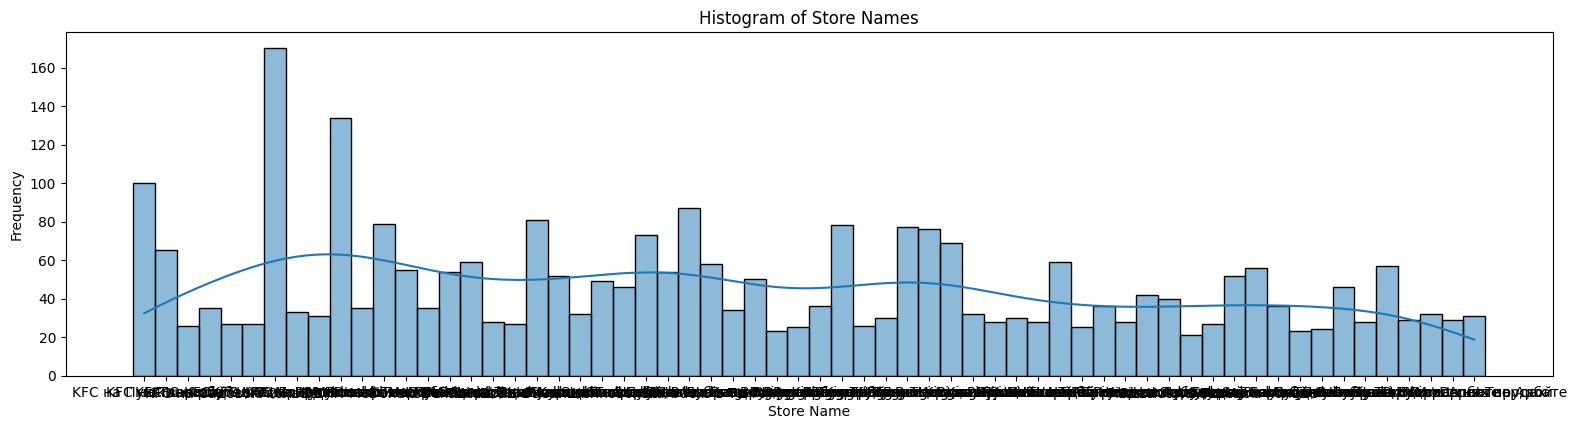

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.histplot(data=df[df.BEDS < 12], x="BEDS", kde=True)
# Устанавливаем размер графиков
plt.figure(figsize=(16, 12))

# График для store_name (фильтр может быть применен при необходимости)
plt.subplot(3, 1, 1)  # 3 строки, 1 столбец, 1-й график
sns.histplot(data=orders_expanded_df[orders_expanded_df['store_name'].notnull()], x='store_name', kde=True)
plt.title('Histogram of Store Names')
plt.xlabel('Store Name')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()

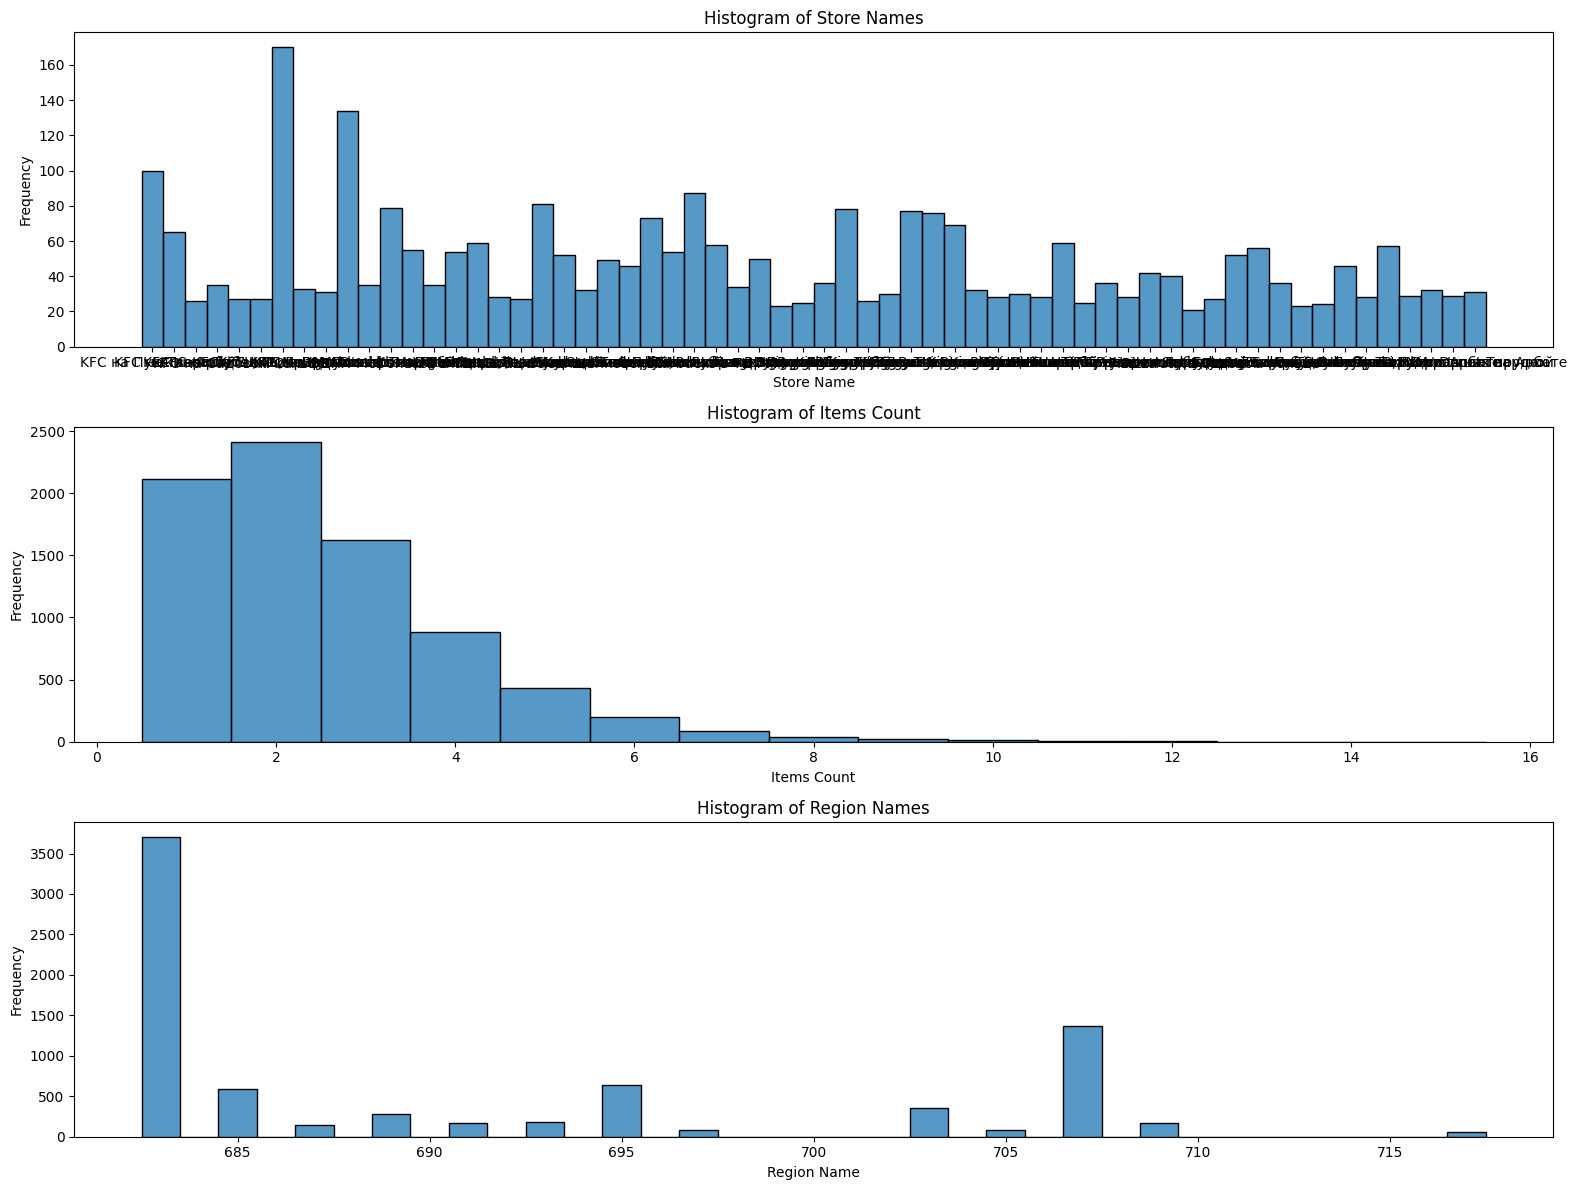

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Устанавливаем размер графиков
plt.figure(figsize=(16, 12))

# Графики для дискретных признаков
plt.subplot(3, 1, 1)  # 3 строки, 1 столбец, 1-й график
sns.histplot(orders_expanded_df['store_name'], kde=False, discrete=True)
plt.title('Histogram of Store Names')
plt.xlabel('Store Name')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)  # 3 строки, 1 столбец, 2-й график
sns.histplot(orders_expanded_df['items_count'], kde=False, discrete=True)
plt.title('Histogram of Items Count')
plt.xlabel('Items Count')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)  # 3 строки, 1 столбец, 3-й график
sns.histplot(orders_expanded_df['region_id'], kde=False, discrete=True)
plt.title('Histogram of Region Names')
plt.xlabel('Region Name')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-37-7db2cc1e7b5c>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-7db2cc1e7b5c>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-7db2cc1e7b5c>:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-7db2cc1e7b5c>:23: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




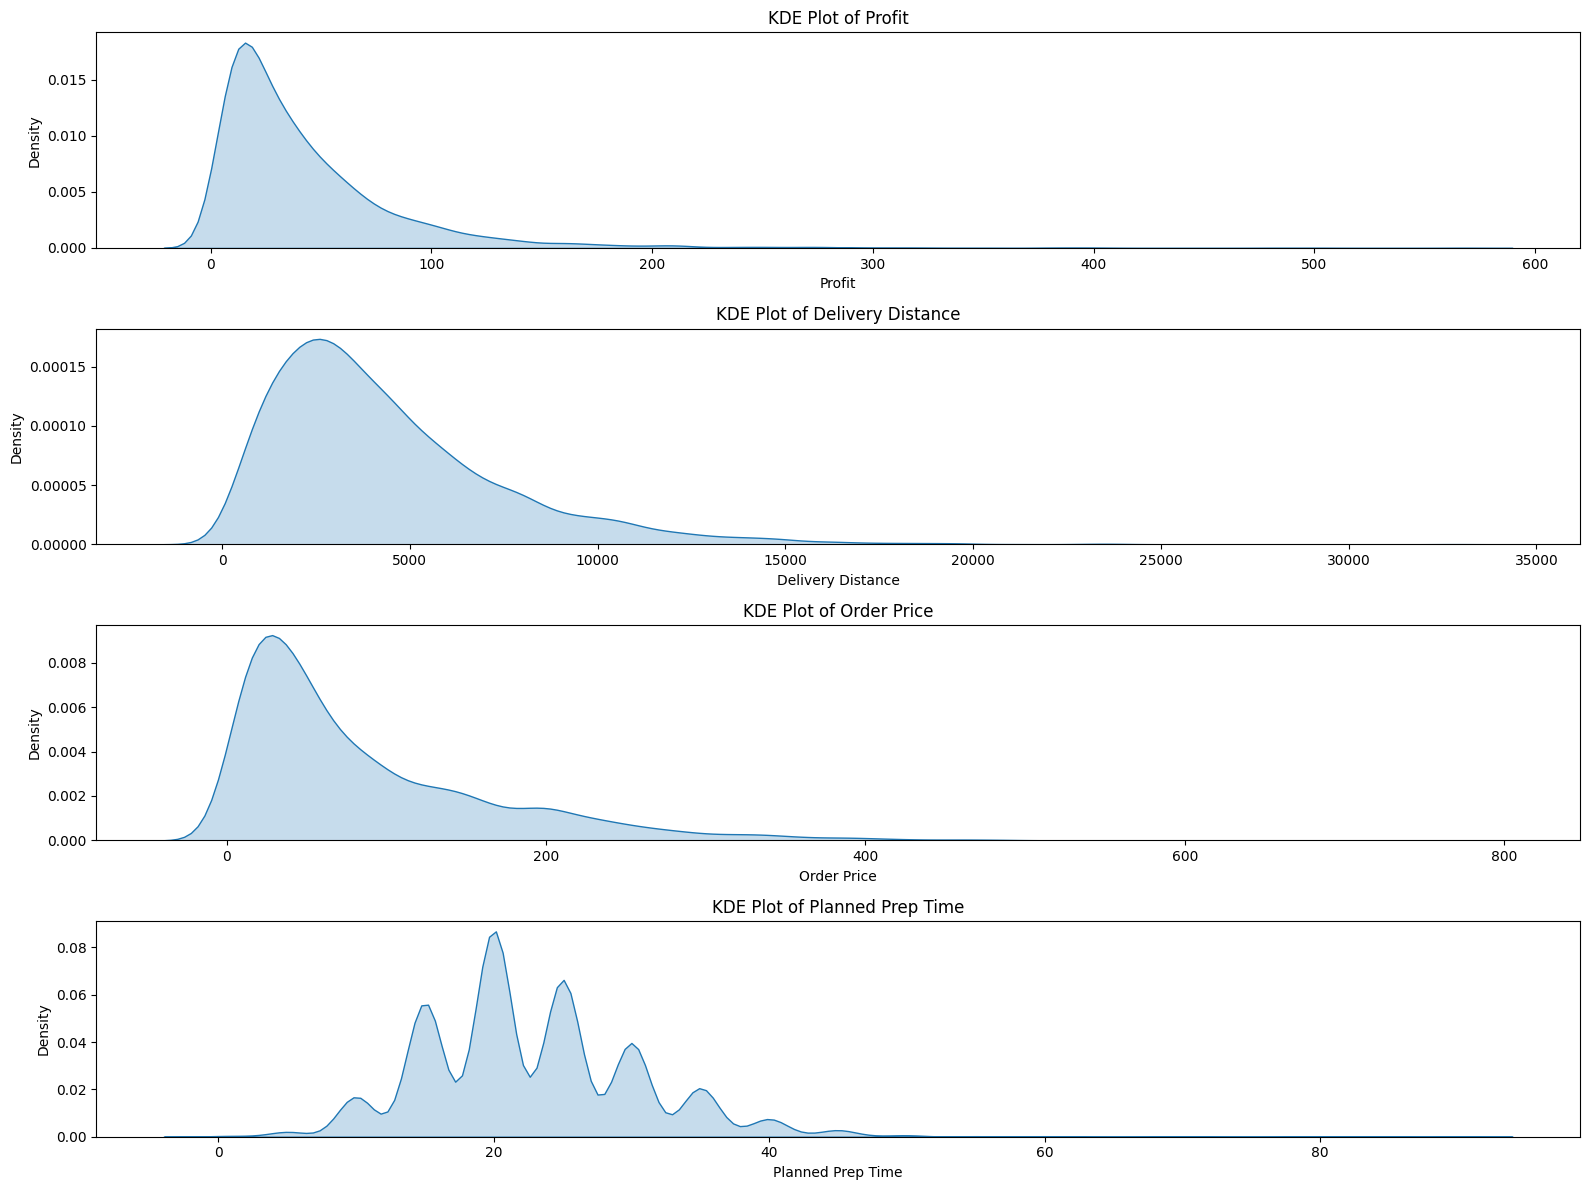

In [ ]:
# Графики для непрерывных признаков
plt.figure(figsize=(16, 12))

plt.subplot(4, 1, 1)  # 4 строки, 1 столбец, 1-й график
sns.kdeplot(orders_expanded_df['profit'], shade=True)
plt.title('KDE Plot of Profit')
plt.xlabel('Profit')
plt.ylabel('Density')

plt.subplot(4, 1, 2)  # 4 строки, 1 столбец, 2-й график
sns.kdeplot(orders_expanded_df['delivery_distance'], shade=True)
plt.title('KDE Plot of Delivery Distance')
plt.xlabel('Delivery Distance')
plt.ylabel('Density')

plt.subplot(4, 1, 3)  # 4 строки, 1 столбец, 3-й график
sns.kdeplot(orders_expanded_df['order_price'], shade=True)
plt.title('KDE Plot of Order Price')
plt.xlabel('Order Price')
plt.ylabel('Density')

plt.subplot(4, 1, 4)  # 4 строки, 1 столбец, 4-й график
sns.kdeplot(orders_expanded_df['planned_prep_time'], shade=True)
plt.title('KDE Plot of Planned Prep Time')
plt.xlabel('Planned Prep Time')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

#### 3. Сделать выводы. Колонки с названиями можно удалить.



In [ ]:
# Удаление колонок с названиями из DataFrame
orders_expanded_df = orders_expanded_df.drop(columns=['store_name', 'delivery_region_name'], errors='ignore')


### 15.	Провести анализ на наличие выбросов в данных.

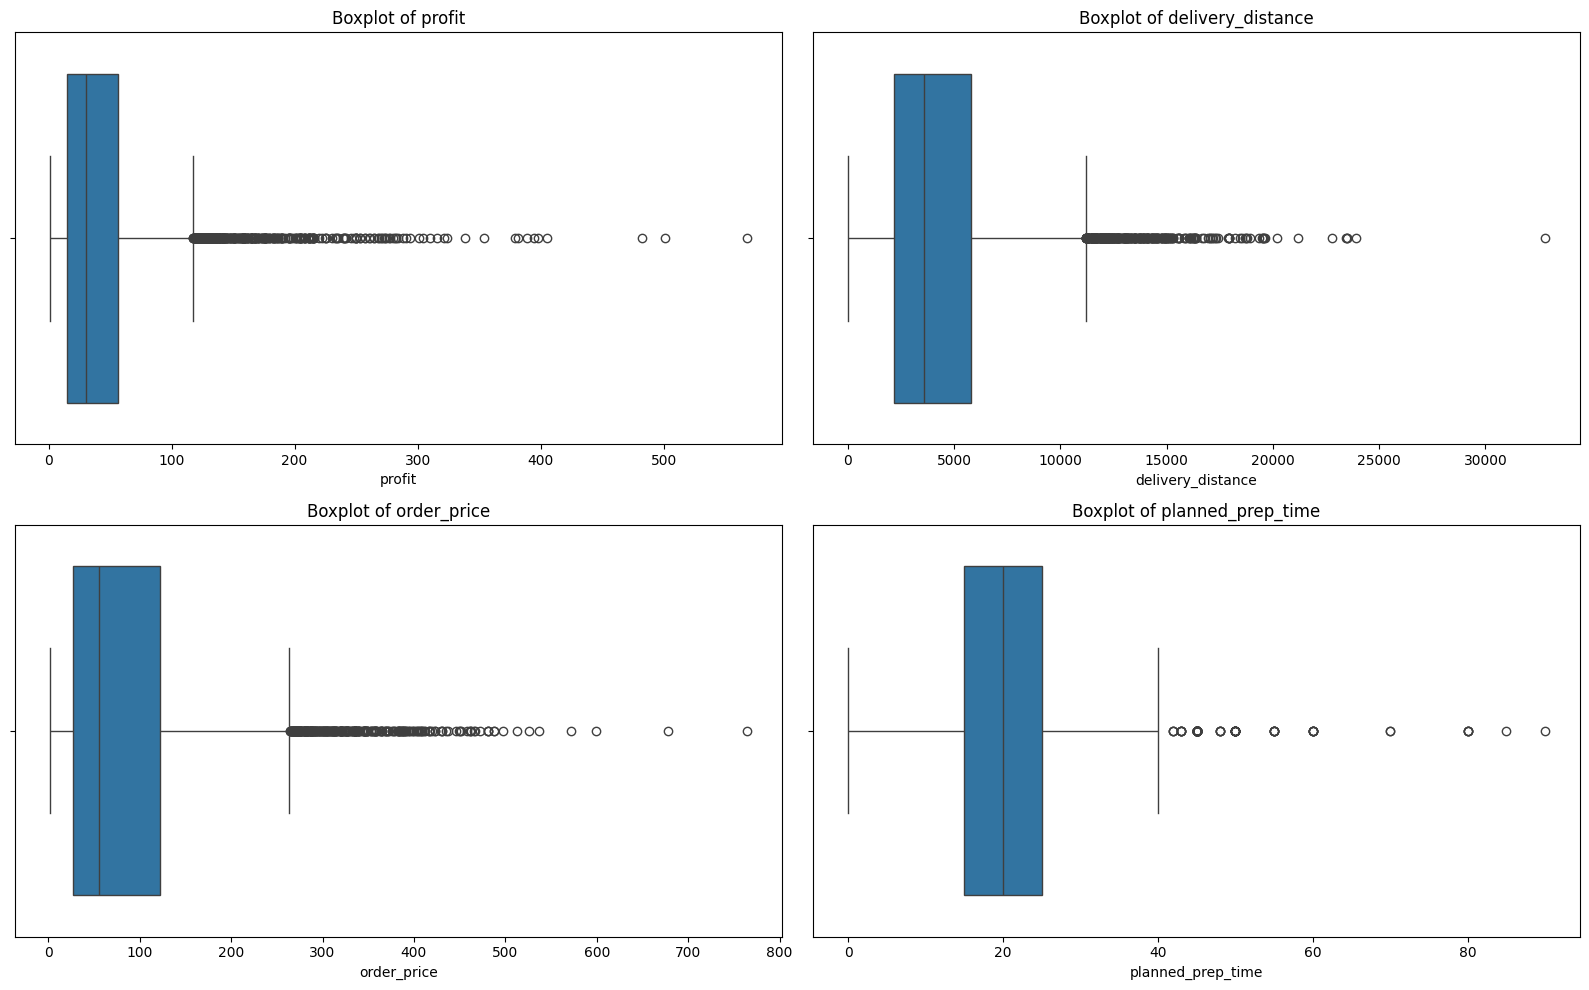

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Устанавливаем размер графиков
plt.figure(figsize=(16, 10))

# Построение boxplot для числовых признаков
numeric_columns = ['profit', 'delivery_distance', 'order_price', 'planned_prep_time']

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=orders_expanded_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
# Функция для выявления выбросов
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Поиск и вывод информации о выбросах для каждой числовой колонки
for column in numeric_columns:
    outliers = detect_outliers(orders_expanded_df, column)
    print(f'Количество выбросов в {column}: {len(outliers)}')
    print(outliers[column].describe(), "\n")


Количество выбросов в profit: 386
count    386.000000
mean     174.737227
std       63.195138
min      117.552000
25%      131.456000
50%      156.285700
75%      197.026000
max      567.615000
Name: profit, dtype: float64 

Количество выбросов в delivery_distance: 304
count      304.000000
mean     13852.391447
std       2659.573288
min      11191.000000
25%      11979.250000
50%      13121.500000
75%      14842.000000
max      32808.000000
Name: delivery_distance, dtype: float64 

Количество выбросов в order_price: 327
count    327.000000
mean     335.822508
std       67.481371
min      263.920000
25%      286.630000
50%      320.400000
75%      364.330000
max      764.270000
Name: order_price, dtype: float64 

Количество выбросов в planned_prep_time: 117
count    117.000000
mean      49.213675
std        9.333689
min       42.000000
25%       45.000000
50%       45.000000
75%       50.000000
max       90.000000
Name: planned_prep_time, dtype: float64 



### 16.	Выбрать стратегию избавления от NaN-значений и аномалий. Обосновать выбор стратегии. Применить стратегию.

In [ ]:
orders_expanded_df

,Unnamed: 0,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_assembly,order_assembly_min,order_delay,product_name,items_count,order_price
0,0,5014,20562761,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,Nachos,2,30.49
2,2,3856,20562753,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,Soup,2,240.78
4,4,10825,20562723,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F,0 days 00:14:54,14.900000,5.100000,Sushi,1,85.99
5,5,5640,20562673,32.8640,2611,2024-09-05 15:19,2024-09-05 15:19:05,20.0,2024-09-05 15:35:25,05-09-2024 16:03:25,709,F,0 days 00:16:20,16.333333,3.666667,Burrito,2,24.68
7,7,7283,20562665,11.0600,1041,2024-09-05 15:18:39,NaT,15.0,2024-09-05 15:35:33,05-09-2024 16:03:33,707,F,NaT,NaN,NaN,Frittata,1,14.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,19984,7557,20535845,50.1650,8046,2024-09-03 15:02:55,2024-09-03 15:03:01,35.0,2024-09-03 15:27:37,03-09-2024 15:55:37,683,F,0 days 00:24:36,24.600000,10.400000,Jambalaya,5,277.28
19989,19989,4548,20535841,14.6150,2225,2024-09-03 15:01:55,2024-09-03 15:02:04,20.0,2024-09-03 15:17:18,03-09-2024 15:45:18,707,F,0 days 00:15:14,15.233333,4.766667,Waffle,2,21.05
19991,19991,7099,20535837,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,683,F,0 days 00:25:13,25.216667,-0.216667,Nachos,5,102.11
19996,19996,4348,20535835,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,Steak,3,43.43


In [ ]:
# Замена пропусков в числовых колонках медианными значениями
numeric_columns = ['profit', 'delivery_distance', 'order_price', 'planned_prep_time']
orders_expanded_df[numeric_columns] = orders_expanded_df[numeric_columns].fillna(orders_expanded_df[numeric_columns].median())



In [ ]:
# Функция для замены выбросов на границы IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Применяем функцию к числовым колонкам
for column in ['profit', 'delivery_distance', 'order_price', 'planned_prep_time']:
    cap_outliers(orders_expanded_df, column)


### 17.	Создать целевую переменную «prepared_on_time» («Заказ выполнен вовремя») — является ли фактическое время заказа (actual_time) меньше запланированного времени (planned_prep_time) + 5 минут? Если да, то заказ считается выполненным вовремя. actual_time рассчитывается как разница между «order_ready» и «order_start_prepare». При необходимости закодировать в бинарный формат (1 и 0, где 1 - заказ выполнен вовремя). Если создавалась колонка «actual_time», то удалить.

In [ ]:
import pandas as pd

# Рассчитаем фактическое время выполнения заказа как разницу между order_ready и order_start_prepare
orders_expanded_df['actual_time'] = (orders_expanded_df['order_ready'] - orders_expanded_df['order_start_prepare']).dt.total_seconds() / 60  # переводим разницу во время в минуты

# Создадим целевую переменную 'prepared_on_time'
orders_expanded_df['prepared_on_time'] = (orders_expanded_df['actual_time'] <= orders_expanded_df['planned_prep_time'] + 5).astype(int)

# Удалим колонку 'actual_time', так как она больше не нужна
orders_expanded_df = orders_expanded_df.drop(columns=['actual_time'])

# Проверим результат
print(orders_expanded_df[['prepared_on_time']].head())


   prepared_on_time
0                 1
2                 1
4                 1
5                 1
7                 0


### 18.	 Посчитать корреляцию между всеми числовыми признаками (profit, delivery_distance,	 store_id, planned_prep_time, region_id, items_count, order_price) и целевой переменной («prepared_on_time»), визуализировать с помощью heatmap.

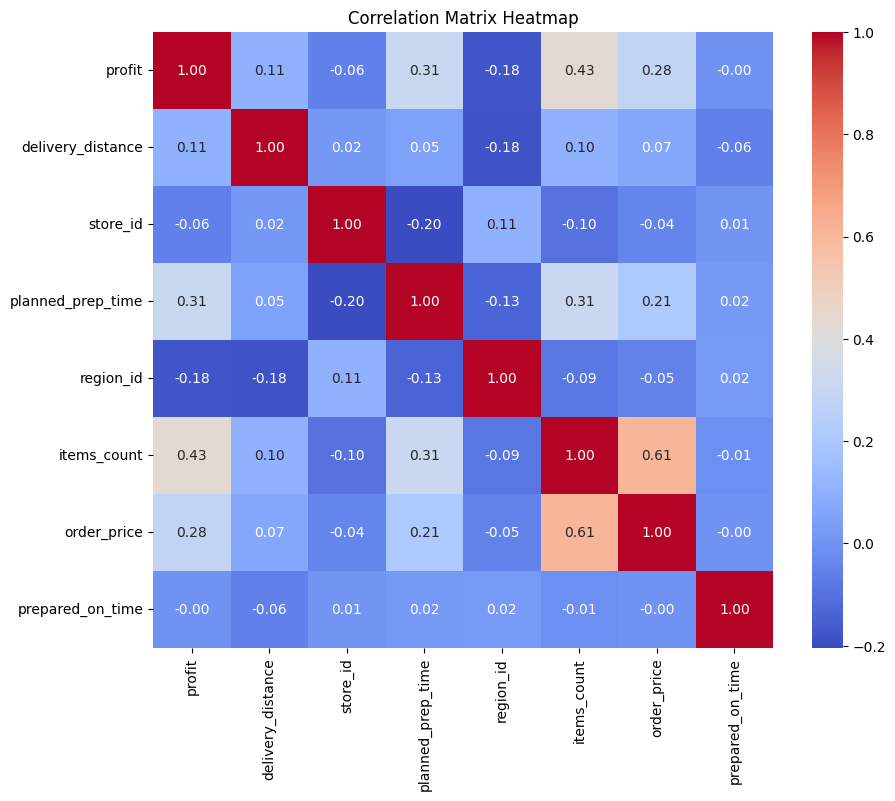

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем числовые признаки и целевую переменную
correlation_columns = ['profit', 'delivery_distance', 'store_id', 'planned_prep_time',
                       'region_id', 'items_count', 'order_price', 'prepared_on_time']

# Создаем DataFrame с только этими колонками
correlation_df = orders_expanded_df[correlation_columns]

# Вычисляем корреляционную матрицу
correlation_matrix = correlation_df.corr()

# Построение тепловой карты корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


### 19.	Сделать выводы по каждому пункту выше.

Вот краткие выводы по каждому пункту, которые помогут понять, что удалось достичь на каждом этапе и как это повлияло на данные.

1. Стратегия по обработке **NaN**-значений и выбросов
Заполнение пропусков :
Числовые колонки были заполнены медианными значениями, по идее позволит избежать смещения данных в если есть выбросы.

Обработка выбросов:
Для числовых признаков, таких как profit, delivery_distance, order_price, и planned_prep_time, выбросы были ограничены интерквартильным размахом **IQR**, для минимизации влияния больших значений, которые могут исказить анализ, сохранив  широкий диапазон данных.  

2. Создание целевой переменной prepared_on_time
Целевая переменная: была создана переменная prepared_on_time, которая показывает, был ли заказ выполнен вовремя (значение 1) или с задержкой (значение 0), основываясь на фактическом и запланированном времени подготовки заказа.
Рассчитанная переменная actual_time использовалась только для вычислений и была удалена после создания prepared_on_time, чтобы избежать избыточности в данных.


3. Корреляция между числовыми признаками и prepared_on_time
Анализ корреляции: был проведен анализ корреляции между числовыми признаками (profit, delivery_distance, store_id, planned_prep_time, region_id, items_count, order_price) и целевой переменной prepared_on_time. Корреляционная матрица показала, какие признаки имеют более тесную или слабую связь с выполнением заказов вовремя.
Визуализация heatmap позволила увидеть значения корреляции. Признаки с высокими положительными или отрицательными корреляциями могут указывать на факторы, связанные с выполнением заказов

Выводы из корреляции:
Если признаки, такие как planned_prep_time или delivery_distance, показали значимую корреляцию с prepared_on_time, это может означать, что время на подготовку или расстояние доставки влияет на выполнение заказа вовремя.
Слабая корреляция для других признаков может означать, что они имеют меньшую предсказательную способность для данной целевой переменной, и их влияние на выполнение заказа может быть незначительным.


Соохраним в файле для след самостоятельной работы!

In [46]:
orders_expanded_df

,Unnamed: 0,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_assembly,order_assembly_min,order_delay,product_name,items_count,order_price,prepared_on_time
0,0,5014,20562761,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,Nachos,2,30.49,1
2,2,3856,20562753,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,Soup,2,240.78,1
4,4,10825,20562723,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F,0 days 00:14:54,14.900000,5.100000,Sushi,1,85.99,1
5,5,5640,20562673,32.8640,2611,2024-09-05 15:19,2024-09-05 15:19:05,20.0,2024-09-05 15:35:25,05-09-2024 16:03:25,709,F,0 days 00:16:20,16.333333,3.666667,Burrito,2,24.68,1
7,7,7283,20562665,11.0600,1041,2024-09-05 15:18:39,NaT,15.0,2024-09-05 15:35:33,05-09-2024 16:03:33,707,F,NaT,NaN,NaN,Frittata,1,14.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,19984,7557,20535845,50.1650,8046,2024-09-03 15:02:55,2024-09-03 15:03:01,35.0,2024-09-03 15:27:37,03-09-2024 15:55:37,683,F,0 days 00:24:36,24.600000,10.400000,Jambalaya,5,263.85,1
19989,19989,4548,20535841,14.6150,2225,2024-09-03 15:01:55,2024-09-03 15:02:04,20.0,2024-09-03 15:17:18,03-09-2024 15:45:18,707,F,0 days 00:15:14,15.233333,4.766667,Waffle,2,21.05,1
19991,19991,7099,20535837,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,683,F,0 days 00:25:13,25.216667,-0.216667,Nachos,5,102.11,1
19996,19996,4348,20535835,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,Steak,3,43.43,1


In [47]:
# Сохраняем DataFrame в CSV файл
file_name = 'orders_expanded_df.csv'
orders_expanded_df.to_csv(file_name, index=False)

# Скачиваем файл на локальный компьютер
from google.colab import files
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>